# Prepare Data

### Import

In [13]:
from glob import glob

import pandas as pd

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

### Explore

In [14]:
files = glob('*.csv') 
files

['crop1.csv', 'food_data.csv', 'live1.csv', 'pop1.csv']

In [15]:
def wrangle(filepath):
    '''
    This function creates a subset of the original dataset
    
    input: Filepath for dataset 
    output: Returns subset 
    '''
    df = pd.read_csv(filepath)
    #subsetting for Nigeria only
    mask_NIG = df['Area'] == 'Nigeria'
    df = df[mask_NIG]
    
    return df

In [16]:

to_be_used = ['crop1.csv', 'live1.csv']

frame = [wrangle(file) for file in to_be_used]#list comprehension that calls function
frame = pd.concat(frame, ignore_index= True)#concats both dataset
print(frame.shape)
frame.info()

(7795, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7795 entries, 0 to 7794
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     7795 non-null   object 
 1   Item     7795 non-null   object 
 2   Element  7795 non-null   object 
 3   Year     7795 non-null   int64  
 4   Unit     7795 non-null   object 
 5   Value    7641 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 365.5+ KB


In [17]:
frame.nunique()

Area          1
Item         52
Element       4
Year         60
Unit          6
Value      4762
dtype: int64

**NOTE:** I would join both tables on the YEAR column.

In [18]:
pop = pd.read_csv('pop1.csv')#reads population dataset

In [19]:
# creates a subset for NIGERIA
mask_pop = pop['Country Name'] == 'Nigeria'
NIG_pop = pop[mask_pop]
NIG_pop

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
174,Nigeria,NGA,45138460.0,46063570.0,47029818.0,48032932.0,49066762.0,50127920.0,51217969.0,52342231.0,...,167228803.0,171765819.0,176404931.0,181137454.0,185960244.0,190873247.0,195874685.0,200963603.0,206139587.0,211400704.0


In [20]:
NIG_pop= pd.melt(NIG_pop, id_vars=['Country Name', 'Country Code'], var_name = 'Year', value_name = 'Population size')

In [21]:
NIG_pop.drop(columns = ['Country Code', 'Country Name'], inplace = True)
print(NIG_pop.shape)
NIG_pop.info()

(62, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             62 non-null     object 
 1   Population size  62 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [23]:
NIG_pop['Year'] = NIG_pop['Year'].astype('int64')
NIG_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             62 non-null     int64  
 1   Population size  62 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [34]:
df = pd.merge(frame, NIG_pop, how = 'inner', on = 'Year')
print(df.shape)
df.head()

(7795, 7)


,Area,Item,Element,Year,Unit,Value,Population size
0,Nigeria,"Bastfibres, other",Area harvested,1981,ha,1000.0,75440505.0
1,Nigeria,"Bastfibres, other",Yield,1981,hg/ha,5300.0,75440505.0
2,Nigeria,"Bastfibres, other",Production,1981,tonnes,530.0,75440505.0
3,Nigeria,Carrots and turnips,Area harvested,1981,ha,20000.0,75440505.0
4,Nigeria,Carrots and turnips,Yield,1981,hg/ha,75000.0,75440505.0


In [26]:
df=df.drop(columns = 'Area', inplace = False)

Removed the AREA columns because it has just one value.

In [29]:
df.nunique()

Item                 52
Element               4
Year                 60
Unit                  6
Value              4762
Population size      60
dtype: int64

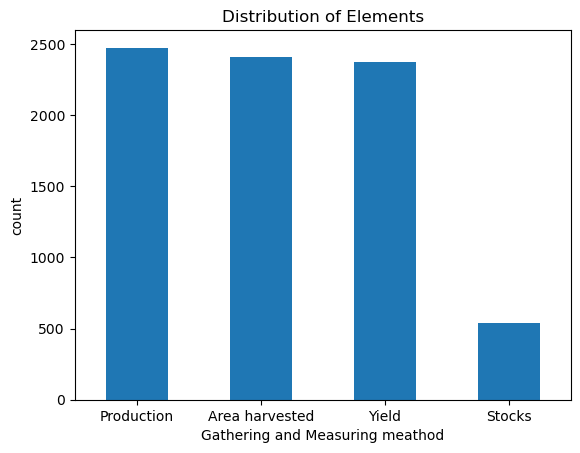

In [38]:
df['Element'].value_counts().plot(
    kind = 'bar', 
    xlabel = 'Gathering and Measuring meathod', 
    ylabel = 'count', title = 'Distribution of Elements')
plt.xticks(rotation = 0);

For crops, it can be identified that each crop is gathered and measured in three ways by production, crop yield, and area harvested. Each of these method of gathering and measurement have their own units of measurement. For production method it is meausred in tonnes, crop yield in hectogram (hg), and finally area is measured in hectares(ha).

While animals are gathered in stocks and measured in Head.

In [41]:
df.plot(x = df['Year'], y = df['Population size'])

KeyError: "None of [Int64Index([1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981,\n            ...\n            1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980],\n           dtype='int64', length=7795)] are in the [columns]"

In [30]:
df.to_csv('food_data.csv', index = False)

### Split

# Build Model

### Baseline

### Iterate

### Evaluate

# Communicate Results